In [26]:
!pip3 install git+https://github.com/holounic/Bayesian-Optimization.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/holounic/Bayesian-Optimization.git to /tmp/pip-req-build-1i0itrix
  Running command git clone -q https://github.com/holounic/Bayesian-Optimization.git /tmp/pip-req-build-1i0itrix
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Cloning https://github.com/holounic/pyDOE to /tmp/pip-install-m5atoz2w/pydoe_8ae8151666794bd297aae6e737bd50a9
  Running command git clone -q https://github.com/holounic/pyDOE /tmp/pip-install-m5atoz2w/pydoe_8ae8151666794bd297aae6e737bd50a9


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from benchmark.bbobbenchmarks import F9
from bayes_optim.search_space import RealSpace

In [28]:
dim = 2
lb, ub = -5, 5
space = RealSpace([lb, ub]) * dim
f_name = 'f8'
f = F9

samples = space.sample(50000)

In [29]:
def fix_numeric_data(df):
  regrets = [float(x[1:-1]) for x in df['regret'].tolist()]
  df['regret'] = regrets
  return df

In [30]:
def minmax_normalisation():
  minmax = []
  for i in range(50):
    func = f(i)
    minmax.append(func(samples).max() - func.getfopt())
  return minmax

In [31]:
def abs_normalisation():
  n = []
  for i in range(50):
    func = f(i)
    n.append(func(samples).mean() - func.getfopt())
  return n

In [32]:
cma_es_50 = fix_numeric_data(pd.read_csv(f'{f_name}_cma_es_doe_normalized_50.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'cma_es_50_regret', 'min_dist_to_opt': 'dopt_50_cma'})
cma_es_init_50 = fix_numeric_data(pd.read_csv(f'{f_name}_lhs_initial_doe_normalized_50.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'lhs_init_50_regret', 'min_dist_to_opt': 'dopt_50_init'})
cma_es = fix_numeric_data(pd.read_csv(f'{f_name}_cma_es_doe_normalized.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'cma_es_regret', 'min_dist_to_opt': 'dopt_cma'})
cma_es_init = fix_numeric_data(pd.read_csv(f'{f_name}_lhs_initial_doe_normalized.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'lhs_init_regret', 'min_dist_to_opt': 'dopt_init'})
uniform = fix_numeric_data(pd.read_csv(f'uniform_doe_{f_name}.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'uniform_regret', 'min_dist_to_opt': 'dopt_uni'})
lhs = fix_numeric_data(pd.read_csv(f'lhs_doe_{f_name}.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'lhs_regret', 'min_dist_to_opt': 'dopt_lhs'})
halton = fix_numeric_data(pd.read_csv(f'halton_doe_{f_name}.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'halton_regret', 'min_dist_to_opt': 'dopt_hal'})
sobol = fix_numeric_data(pd.read_csv(f'sobol_doe_{f_name}.csv')[['regret', 'f_s', 'min_dist_to_opt']]).rename(columns={'regret': 'sobol_regret', 'min_dist_to_opt': 'dopt_sob'})
stats = cma_es_50.merge(cma_es_init_50.merge(cma_es.merge(uniform.merge(lhs.merge(sobol.merge(halton.merge(cma_es_init)))))))
stats['minmax_norm'] = minmax_normalisation()
stats['abs_norm'] = abs_normalisation()
stats.head()

,cma_es_50_regret,f_s,dopt_50_cma,lhs_init_50_regret,dopt_50_init,cma_es_regret,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
0,1.385907,0,0.536370,1.723444,2.514465,4.795509,4.320456,13.609549,4.032802,5.726170,2.545251,180.139940,1.383532,1.653551,2.589033,2.797031,1.730555,245601.382693,15458.351916
1,0.006072,1,2.786432,0.951097,1.569653,0.966131,2.728567,1.542362,2.117679,2.845405,2.388490,110.874183,1.459707,0.082943,1.261357,1.829519,1.752485,308795.396590,18129.291887
2,5.706300,2,1.096903,14.333503,1.387466,0.622004,0.957242,9.619277,2.537258,6.730328,1.378006,0.319268,1.162316,0.474555,1.044397,2.330897,0.917046,318658.826656,17812.556135
3,1.390669,3,2.154216,3.990808,2.355368,3.043431,2.974925,21.783295,2.588720,0.546522,1.190796,1.629811,0.195911,3.425719,1.121187,7.584926,0.737251,251607.076460,16788.459625
4,10.822009,4,2.607711,0.889001,2.080191,15.698642,2.709922,3.623685,0.537094,10.813254,1.978393,2.041338,2.407376,0.613731,1.393763,1.236061,1.302345,160252.251725,14046.895837


# CMA-ES on 20 iterations

## vs first individual (generated by LHS)

In [33]:
cma_init = stats.loc[stats['cma_es_regret'] < stats['lhs_init_regret']]
print(f'CMA-ES improved lhs DoE on {cma_init.shape[0]}, ({100 * cma_init.shape[0] / stats.shape[0]}%) function instances')
cma_init[['f_s', 'cma_es_regret', 'lhs_init_regret', 'dopt_cma', 'dopt_init']]

CMA-ES improved lhs DoE on 32, (64.0%) function instances


,f_s,cma_es_regret,lhs_init_regret,dopt_cma,dopt_init
1,1,0.966131,1.829519,2.728567,1.752485
2,2,0.622004,2.330897,0.957242,0.917046
3,3,3.043431,7.584926,2.974925,0.737251
5,5,1.091377,108.060424,0.484691,1.552706
7,7,2.130476,4.358627,2.690662,1.800451
8,8,0.238367,33.480003,4.164695,1.794182
10,10,0.298821,1.618324,2.528782,1.330027
11,11,1.198859,3.520898,4.507477,2.209895
12,12,0.002897,15.651120,1.855970,0.936010
13,13,0.024728,0.437337,2.366871,1.822580


In [34]:
cma_init = stats.loc[stats['cma_es_regret'] > stats['lhs_init_regret']]
print(f'CMA-ES worstened lhs DoE on {cma_init.shape[0]}, ({100 * cma_init.shape[0] / stats.shape[0]}%) function instances')
cma_init[['f_s', 'cma_es_regret', 'lhs_init_regret', 'dopt_cma', 'dopt_init']]

CMA-ES worstened lhs DoE on 18, (36.0%) function instances


,f_s,cma_es_regret,lhs_init_regret,dopt_cma,dopt_init
0,0,4.795509,2.797031,4.320456,1.730555
4,4,15.698642,1.236061,2.709922,1.302345
6,6,7.149106,0.589937,1.452293,1.494213
9,9,6.835748,4.276320,4.199145,2.597344
15,15,1.671340,0.739510,0.816987,2.385591
17,17,40.470219,3.817055,1.926442,0.763855
20,20,0.648662,0.144780,2.894797,0.299040
22,22,8.857137,4.212882,2.216294,1.002861
23,23,3.932857,0.559743,3.194973,2.694917
24,24,11.259810,0.492194,1.121861,2.552559


## vs Uniform

In [35]:
cma_uniform = stats.loc[stats['cma_es_regret'] < stats['uniform_regret']]
print(f'DoE generated by CMA-ES is better than uniformly sampled DoE on {cma_uniform.shape[0]}, ({100 * cma_uniform.shape[0] / stats.shape[0]}%) function instances')
cma_uniform[['f_s', 'cma_es_regret', 'uniform_regret']]

DoE generated by CMA-ES is better than uniformly sampled DoE on 30, (60.0%) function instances


,f_s,cma_es_regret,uniform_regret
0,0,4.795509,13.609549
1,1,0.966131,1.542362
2,2,0.622004,9.619277
3,3,3.043431,21.783295
5,5,1.091377,8.317905
6,6,7.149106,17.067246
7,7,2.130476,3.730584
8,8,0.238367,2.690482
10,10,0.298821,0.991652
12,12,0.002897,6.382583


## vs LHS

In [36]:
cma_lhs = stats.loc[stats['cma_es_regret'] < stats['lhs_regret']]
print(f'DoE generated by CMA-ES is better than lhs sampled DoE on {cma_lhs.shape[0]} ({100 * cma_lhs.shape[0] / stats.shape[0]}%) function instances')
cma_lhs[['f_s', 'cma_es_regret', 'lhs_regret', 'dopt_cma', 'dopt_lhs']]

DoE generated by CMA-ES is better than lhs sampled DoE on 27 (54.0%) function instances


,f_s,cma_es_regret,lhs_regret,dopt_cma,dopt_lhs
0,0,4.795509,5.726170,4.320456,2.545251
1,1,0.966131,2.845405,2.728567,2.388490
2,2,0.622004,6.730328,0.957242,1.378006
5,5,1.091377,1.390926,0.484691,1.111414
8,8,0.238367,5.594458,4.164695,1.169649
10,10,0.298821,0.673689,2.528782,2.520999
11,11,1.198859,3.895262,4.507477,2.325056
12,12,0.002897,14.490243,1.855970,0.631525
13,13,0.024728,0.051349,2.366871,1.917855
14,14,4.101530,18.542655,3.291591,2.611070


## vs Sobol

In [37]:
cma_sobol = stats.loc[stats['cma_es_regret'] < stats['sobol_regret']]
print(f'DoE generated by CMA-ES is better than sobol generated DoE on {cma_sobol.shape[0]} ({100 * cma_sobol.shape[0] / stats.shape[0]}%) function instances')
cma_sobol[['f_s', 'cma_es_regret', 'sobol_regret', 'dopt_cma', 'dopt_sob']]

DoE generated by CMA-ES is better than sobol generated DoE on 27 (54.0%) function instances


,f_s,cma_es_regret,sobol_regret,dopt_cma,dopt_sob
0,0,4.795509,180.139940,4.320456,1.383532
1,1,0.966131,110.874183,2.728567,1.459707
5,5,1.091377,3.350135,0.484691,0.953127
7,7,2.130476,2.383184,2.690662,0.312927
8,8,0.238367,3.475825,4.164695,1.913236
10,10,0.298821,5.278734,2.528782,2.504513
11,11,1.198859,3.641218,4.507477,2.707660
12,12,0.002897,32.168563,1.855970,2.281834
13,13,0.024728,1.982471,2.366871,1.040945
14,14,4.101530,10.617775,3.291591,1.610083


## vs Halton

In [38]:
cma_halton = stats.loc[stats['cma_es_regret'] < stats['halton_regret']]
print(f'DoE generated by CMA-ES is better than halton generated DoE on {cma_halton.shape[0]} ({100 * cma_halton.shape[0] / stats.shape[0]}%) function instances')
cma_halton[['f_s', 'cma_es_regret', 'halton_regret', 'dopt_cma', 'dopt_hal']]

DoE generated by CMA-ES is better than halton generated DoE on 28 (56.0%) function instances


,f_s,cma_es_regret,halton_regret,dopt_cma,dopt_hal
3,3,3.043431,3.425719,2.974925,1.121187
6,6,7.149106,88.397229,1.452293,3.332766
8,8,0.238367,4.290194,4.164695,1.583048
11,11,1.198859,2.494132,4.507477,0.978590
12,12,0.002897,0.448713,1.855970,1.967195
13,13,0.024728,1.034911,2.366871,0.737642
14,14,4.101530,5.175030,3.291591,1.576211
16,16,3.250321,15.126580,1.173831,1.006675
18,18,1.623855,4.358441,4.112456,1.339798
19,19,0.028016,2.087634,3.333542,3.017322


## vs CMA-ES 50

In [39]:
cma_halton = stats.loc[stats['cma_es_50_regret'] > stats['cma_es_regret']]
print(f'DoE generated by CMA-ES is better than halton generated DoE on {cma_halton.shape[0]} ({100 * cma_halton.shape[0] / stats.shape[0]}%) function instances')
cma_halton[['f_s', 'cma_es_50_regret', 'cma_es_regret', 'dopt_50_cma', 'dopt_cma']]

DoE generated by CMA-ES is better than halton generated DoE on 24 (48.0%) function instances


,f_s,cma_es_50_regret,cma_es_regret,dopt_50_cma,dopt_cma
2,2,5.706300,0.622004,1.096903,0.957242
5,5,1.372683,1.091377,1.838964,0.484691
7,7,2.518497,2.130476,2.778074,2.690662
8,8,0.706097,0.238367,0.840567,4.164695
10,10,0.603721,0.298821,1.100185,2.528782
11,11,5.848288,1.198859,1.139903,4.507477
12,12,6.013132,0.002897,1.390361,1.855970
13,13,0.631445,0.024728,1.662355,2.366871
15,15,3.160828,1.671340,1.643918,0.816987
19,19,0.742825,0.028016,0.899022,3.333542


## Best

In [40]:
best_name = 'cma_es_regret'
cma_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['cma_es_50_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'DoE generated by CMA-ES is better than any baseline generated DoE on {cma_is_best.shape[0]} ({100 * cma_is_best.shape[0] / stats.shape[0]}%) function instances')
cma_is_best

DoE generated by CMA-ES is better than any baseline generated DoE on 7 (14.0%) function instances


,cma_es_50_regret,f_s,dopt_50_cma,lhs_init_50_regret,dopt_50_init,cma_es_regret,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
8,0.706097,8,0.840567,3.228037,2.272225,0.238367,4.164695,2.690482,1.290742,5.594458,1.169649,3.475825,1.913236,4.290194,1.583048,33.480003,1.794182,302141.682938,17769.208052
12,6.013132,12,1.390361,3.034496,1.282352,0.002897,1.855970,6.382583,2.717502,14.490243,0.631525,32.168563,2.281834,0.448713,1.967195,15.651120,0.936010,144628.245619,14720.017542
13,0.631445,13,1.662355,5.922710,0.423546,0.024728,2.366871,0.279846,2.142715,0.051349,1.917855,1.982471,1.040945,1.034911,0.737642,0.437337,1.822580,117057.792418,14251.781571
26,3.391869,26,2.780919,0.495117,3.065458,0.275482,2.035431,0.390121,2.369932,14.555896,1.795514,1.257415,2.350112,7.872930,1.348432,1.220697,1.670372,169108.816076,15192.954188
28,1.623442,28,1.561268,0.542844,2.672809,0.001417,3.218354,7.926869,1.413288,23.465202,2.874319,2.202189,1.257812,5.231557,2.050312,3.761536,1.009916,103358.783349,14134.833020
37,8.310814,37,1.565202,0.489052,1.714140,0.220379,1.668786,10.075497,1.080045,0.429578,2.579181,2.024670,1.059680,10.179420,1.695177,0.754368,2.843346,268733.306933,16134.829311
46,4.447201,46,1.479700,9.679000,1.328941,2.841162,1.758451,10.571591,1.351417,17.949366,2.070578,42.123134,1.095915,9.749025,2.558356,34.854551,0.900811,295878.716702,17733.784446


## Initial individual

In [41]:
best_name = 'lhs_init_regret'
lhs_init_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['cma_es_50_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'LHS init is the best on {lhs_init_is_best.shape[0]} ({100 * lhs_init_is_best.shape[0] / stats.shape[0]}%) function instances')
lhs_init_is_best

LHS init is the best on 4 (8.0%) function instances


,cma_es_50_regret,f_s,dopt_50_cma,lhs_init_50_regret,dopt_50_init,cma_es_regret,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
23,10.392432,23,1.328260,7.050429,1.432089,3.932857,3.194973,3.414229,2.429387,3.316631,1.048686,3.330947,0.446434,1.794291,2.308746,0.559743,2.694917,307290.115204,17920.755631
29,1.763734,29,0.999846,9.025559,1.561989,2.240697,2.517600,2.665209,1.252739,0.698349,2.649974,1.024745,1.184286,2.642054,2.996660,0.576704,0.276159,123775.599139,13874.288962
31,2.156372,31,1.456876,0.513336,1.119334,3.299410,2.255851,0.861433,2.651588,9.631509,1.830626,4.086421,0.646378,4.191165,0.844974,0.607472,3.076399,223000.730628,14971.300180
47,16.807732,47,1.614465,18.925059,1.785539,1.602036,0.393536,1.091693,3.115658,1.004297,3.098296,4.074712,1.516654,6.409598,0.313168,0.726026,0.937897,110583.590780,13884.563972


# CMA-ES on 50 iterations

## vs first individual (generated by LHS)

In [42]:
cma_init = stats.loc[stats['cma_es_50_regret'] < stats['lhs_init_50_regret']]
print(f'CMA-ES improved lhs DoE on {cma_init.shape[0]}, ({100 * cma_init.shape[0] / stats.shape[0]}%) function instances')
cma_init[['f_s', 'cma_es_50_regret', 'lhs_init_50_regret', 'dopt_50_cma', 'dopt_50_init']]

CMA-ES improved lhs DoE on 31, (62.0%) function instances


,f_s,cma_es_50_regret,lhs_init_50_regret,dopt_50_cma,dopt_50_init
0,0,1.385907,1.723444,0.536370,2.514465
1,1,0.006072,0.951097,2.786432,1.569653
2,2,5.706300,14.333503,1.096903,1.387466
3,3,1.390669,3.990808,2.154216,2.355368
6,6,0.660922,0.820133,0.581540,2.805750
8,8,0.706097,3.228037,0.840567,2.272225
9,9,0.314185,14.488960,1.396518,1.307250
10,10,0.603721,10.835544,1.100185,0.641261
11,11,5.848288,8.701830,1.139903,0.644379
13,13,0.631445,5.922710,1.662355,0.423546


In [43]:
cma_init = stats.loc[stats['cma_es_50_regret'] > stats['lhs_init_50_regret']]
print(f'CMA-ES worstened lhs DoE on {cma_init.shape[0]}, ({100 * cma_init.shape[0] / stats.shape[0]}%) function instances')
cma_init[['f_s', 'cma_es_50_regret', 'lhs_init_50_regret', 'dopt_50_cma', 'dopt_50_init']]

CMA-ES worstened lhs DoE on 19, (38.0%) function instances


,f_s,cma_es_50_regret,lhs_init_50_regret,dopt_50_cma,dopt_50_init
4,4,10.822009,0.889001,2.607711,2.080191
5,5,1.372683,0.148196,1.838964,2.096525
7,7,2.518497,0.003680,2.778074,1.499349
12,12,6.013132,3.034496,1.390361,1.282352
15,15,3.160828,0.170200,1.643918,2.553112
16,16,3.001842,0.205517,1.870599,1.515427
21,21,3.144620,1.415540,1.581832,2.493660
23,23,10.392432,7.050429,1.328260,1.432089
26,26,3.391869,0.495117,2.780919,3.065458
27,27,9.368405,4.557866,1.037698,2.566625


## vs Uniform

In [44]:
cma_uniform = stats.loc[stats['cma_es_50_regret'] < stats['uniform_regret']]
print(f'DoE generated by CMA-ES is better than uniformly sampled DoE on {cma_uniform.shape[0]}, ({100 * cma_uniform.shape[0] / stats.shape[0]}%) function instances')
cma_uniform[['f_s', 'cma_es_50_regret', 'uniform_regret', 'dopt_50_cma', 'dopt_uni']]

DoE generated by CMA-ES is better than uniformly sampled DoE on 35, (70.0%) function instances


,f_s,cma_es_50_regret,uniform_regret,dopt_50_cma,dopt_uni
0,0,1.385907,13.609549,0.536370,4.032802
1,1,0.006072,1.542362,2.786432,2.117679
2,2,5.706300,9.619277,1.096903,2.537258
3,3,1.390669,21.783295,2.154216,2.588720
5,5,1.372683,8.317905,1.838964,2.658589
6,6,0.660922,17.067246,0.581540,1.727184
7,7,2.518497,3.730584,2.778074,3.936138
8,8,0.706097,2.690482,0.840567,1.290742
9,9,0.314185,1.780079,1.396518,0.692191
10,10,0.603721,0.991652,1.100185,1.224508


## vs LHS

In [45]:
cma_lhs = stats.loc[stats['cma_es_50_regret'] < stats['lhs_regret']]
print(f'DoE generated by CMA-ES is better than lhs sampled DoE on {cma_lhs.shape[0]} ({100 * cma_lhs.shape[0] / stats.shape[0]}%) function instances')
cma_lhs[['f_s', 'cma_es_50_regret', 'lhs_regret', 'dopt_50_cma', 'dopt_lhs']]

DoE generated by CMA-ES is better than lhs sampled DoE on 31 (62.0%) function instances


,f_s,cma_es_50_regret,lhs_regret,dopt_50_cma,dopt_lhs
0,0,1.385907,5.726170,0.536370,2.545251
1,1,0.006072,2.845405,2.786432,2.388490
2,2,5.706300,6.730328,1.096903,1.378006
5,5,1.372683,1.390926,1.838964,1.111414
6,6,0.660922,5.788300,0.581540,2.072539
8,8,0.706097,5.594458,0.840567,1.169649
9,9,0.314185,0.396686,1.396518,2.489884
10,10,0.603721,0.673689,1.100185,2.520999
12,12,6.013132,14.490243,1.390361,0.631525
14,14,0.082223,18.542655,1.903490,2.611070


## vs Sobol

In [46]:
cma_sobol = stats.loc[stats['cma_es_50_regret'] < stats['sobol_regret']]
print(f'DoE generated by CMA-ES is better than sobol generated DoE on {cma_sobol.shape[0]} ({100 * cma_sobol.shape[0] / stats.shape[0]}%) function instances')
cma_sobol[['f_s', 'cma_es_50_regret', 'sobol_regret', 'dopt_50_cma', 'dopt_sob']]

DoE generated by CMA-ES is better than sobol generated DoE on 28 (56.0%) function instances


,f_s,cma_es_50_regret,sobol_regret,dopt_50_cma,dopt_sob
0,0,1.385907,180.139940,0.536370,1.383532
1,1,0.006072,110.874183,2.786432,1.459707
3,3,1.390669,1.629811,2.154216,0.195911
5,5,1.372683,3.350135,1.838964,0.953127
8,8,0.706097,3.475825,0.840567,1.913236
9,9,0.314185,1.329843,1.396518,1.798954
10,10,0.603721,5.278734,1.100185,2.504513
12,12,6.013132,32.168563,1.390361,2.281834
13,13,0.631445,1.982471,1.662355,1.040945
14,14,0.082223,10.617775,1.903490,1.610083


## vs Halton

In [47]:
cma_halton = stats.loc[stats['cma_es_50_regret'] < stats['halton_regret']]
print(f'DoE generated by CMA-ES is better than halton generated DoE on {cma_halton.shape[0]} ({100 * cma_halton.shape[0] / stats.shape[0]}%) function instances')
cma_halton[['f_s', 'cma_es_50_regret', 'halton_regret', 'dopt_50_cma', 'dopt_hal']]

DoE generated by CMA-ES is better than halton generated DoE on 32 (64.0%) function instances


,f_s,cma_es_50_regret,halton_regret,dopt_50_cma,dopt_hal
0,0,1.385907,1.653551,0.536370,2.589033
1,1,0.006072,0.082943,2.786432,1.261357
3,3,1.390669,3.425719,2.154216,1.121187
6,6,0.660922,88.397229,0.581540,3.332766
8,8,0.706097,4.290194,0.840567,1.583048
9,9,0.314185,1.300925,1.396518,0.597372
13,13,0.631445,1.034911,1.662355,0.737642
14,14,0.082223,5.175030,1.903490,1.576211
16,16,3.001842,15.126580,1.870599,1.006675
17,17,4.383643,7.156572,0.933866,0.802278


## vs CMA-ES 20

In [48]:
cma_halton = stats.loc[stats['cma_es_50_regret'] < stats['cma_es_regret']]
print(f'DoE generated by CMA-ES is better than halton generated DoE on {cma_halton.shape[0]} ({100 * cma_halton.shape[0] / stats.shape[0]}%) function instances')
cma_halton[['f_s', 'cma_es_50_regret', 'cma_es_regret', 'dopt_50_cma', 'dopt_cma']]

DoE generated by CMA-ES is better than halton generated DoE on 26 (52.0%) function instances


,f_s,cma_es_50_regret,cma_es_regret,dopt_50_cma,dopt_cma
0,0,1.385907,4.795509,0.536370,4.320456
1,1,0.006072,0.966131,2.786432,2.728567
3,3,1.390669,3.043431,2.154216,2.974925
4,4,10.822009,15.698642,2.607711,2.709922
6,6,0.660922,7.149106,0.581540,1.452293
9,9,0.314185,6.835748,1.396518,4.199145
14,14,0.082223,4.101530,1.903490,3.291591
16,16,3.001842,3.250321,1.870599,1.173831
17,17,4.383643,40.470219,0.933866,1.926442
18,18,0.017013,1.623855,0.275612,4.112456


## Best percentage

In [49]:
best_name = 'cma_es_50_regret'
cma_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['cma_es_50_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'DoE generated by CMA-ES is better than any baseline generated DoE on {cma_is_best.shape[0]} ({100 * cma_is_best.shape[0] / stats.shape[0]}%) function instances')
cma_is_best

DoE generated by CMA-ES is better than any baseline generated DoE on 14 (28.0%) function instances


,cma_es_50_regret,f_s,dopt_50_cma,lhs_init_50_regret,dopt_50_init,cma_es_regret,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
0,1.385907,0,0.536370,1.723444,2.514465,4.795509,4.320456,13.609549,4.032802,5.726170,2.545251,180.139940,1.383532,1.653551,2.589033,2.797031,1.730555,245601.382693,15458.351916
1,0.006072,1,2.786432,0.951097,1.569653,0.966131,2.728567,1.542362,2.117679,2.845405,2.388490,110.874183,1.459707,0.082943,1.261357,1.829519,1.752485,308795.396590,18129.291887
9,0.314185,9,1.396518,14.488960,1.307250,6.835748,4.199145,1.780079,0.692191,0.396686,2.489884,1.329843,1.798954,1.300925,0.597372,4.276320,2.597344,204039.984248,15763.572836
14,0.082223,14,1.903490,0.411682,2.350145,4.101530,3.291591,4.679746,2.207174,18.542655,2.611070,10.617775,1.610083,5.175030,1.576211,4.198421,0.545415,287958.867884,16590.961819
18,0.017013,18,0.275612,72.973856,2.467365,1.623855,4.112456,32.723888,0.579295,2.507067,1.461242,15.198384,2.132511,4.358441,1.339798,39.379757,1.859508,318967.926669,17876.386931
20,0.067892,20,1.213397,17.900486,1.590003,0.648662,2.894797,0.421819,2.921297,9.748108,1.434082,6.565689,0.952018,95.071721,1.697947,0.144780,0.299040,317374.036163,17972.473800
25,0.299233,25,0.533367,5.395895,0.797720,1.383239,3.281924,1.163089,1.714604,4.475195,2.856470,0.458183,1.945298,9.952297,1.873168,1.465041,0.863918,241013.800319,16602.443649
30,1.215042,30,0.522015,9.334551,2.073585,1.998058,1.629034,10.253377,1.417512,9.014532,1.702137,4.894483,2.121574,2.876440,1.132665,26.367427,0.888843,107514.852405,13822.932921
33,1.714794,33,1.908964,3.096375,1.540574,22.463233,1.123536,3.774195,3.265697,9.469742,2.054586,17.589977,2.488547,17.589977,0.564915,2.157148,0.757558,300370.064383,17827.975063
34,1.001372,34,2.066388,3.636076,0.555971,1.689692,2.882171,4.629288,0.765078,6.717339,1.953943,1.991735,1.255990,4.760157,1.622801,3.690812,2.497415,268602.504235,17182.721007


## Initial individual

In [50]:
best_name = 'lhs_init_50_regret'
lhs_init_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['cma_es_50_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'LHS init is the best on {lhs_init_is_best.shape[0]} ({100 * lhs_init_is_best.shape[0] / stats.shape[0]}%) function instances')
lhs_init_is_best

LHS init is the best on 7 (14.0%) function instances


,cma_es_50_regret,f_s,dopt_50_cma,lhs_init_50_regret,dopt_50_init,cma_es_regret,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
5,1.372683,5,1.838964,0.148196,2.096525,1.091377,0.484691,8.317905,2.658589,1.390926,1.111414,3.350135,0.953127,0.514653,0.894625,108.060424,1.552706,125271.991662,14394.601557
7,2.518497,7,2.778074,0.003680,1.499349,2.130476,2.690662,3.730584,3.936138,0.640811,1.338354,2.383184,0.312927,1.159588,2.664199,4.358627,1.800451,254686.808320,17132.679374
15,3.160828,15,1.643918,0.170200,2.553112,1.671340,0.816987,3.323224,2.694481,8.063670,2.477006,1.155329,1.022344,0.503685,1.034267,0.739510,2.385591,183005.213992,15374.763957
16,3.001842,16,1.870599,0.205517,1.515427,3.250321,1.173831,2.531758,3.046855,3.075374,1.006136,15.126580,3.091753,15.126580,1.006675,15.126580,0.750216,270307.808651,17483.106113
31,2.156372,31,1.456876,0.513336,1.119334,3.299410,2.255851,0.861433,2.651588,9.631509,1.830626,4.086421,0.646378,4.191165,0.844974,0.607472,3.076399,223000.730628,14971.300180
35,17.676346,35,2.100748,2.420151,1.808129,5.380666,1.345947,23.659532,1.555229,14.619581,3.333275,9.485711,1.542478,3.154284,0.540989,5.523818,1.081282,98621.298035,14123.562982
49,1.221422,49,1.031251,0.110609,0.507931,4.806103,2.990680,5.068964,1.229808,9.985628,3.302658,1.393295,1.161330,1.157279,2.676049,24.337823,1.674002,315513.584933,17594.694420


# Baselines

## Uniform

In [51]:
best_name = 'uniform_regret'
uniform_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['cma_es_50_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'Uniform is the best on {uniform_is_best.shape[0]} ({100 * uniform_is_best.shape[0] / stats.shape[0]}%) function instances')
uniform_is_best

Uniform is the best on 6 (12.0%) function instances


,cma_es_50_regret,f_s,dopt_50_cma,lhs_init_50_regret,dopt_50_init,cma_es_regret,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
11,5.848288,11,1.139903,8.701830,0.644379,1.198859,4.507477,0.015744,2.466758,3.895262,2.325056,3.641218,2.707660,2.494132,0.978590,3.520898,2.209895,317423.921953,17963.469905
16,3.001842,16,1.870599,0.205517,1.515427,3.250321,1.173831,2.531758,3.046855,3.075374,1.006136,15.126580,3.091753,15.126580,1.006675,15.126580,0.750216,270307.808651,17483.106113
19,0.742825,19,0.899022,1.469061,0.807974,0.028016,3.333542,0.021790,2.857351,0.785021,2.675818,5.663329,2.189322,2.087634,3.017322,3.674922,1.797749,317453.197090,17952.351925
21,3.144620,21,1.581832,1.415540,2.493660,2.309291,0.873571,0.203542,2.425843,0.678020,2.564410,0.253126,1.433296,7.237667,0.399484,8.850184,2.439931,208493.109487,14673.981941
27,9.368405,27,1.037698,4.557866,2.566625,1.089946,0.623825,0.957658,1.738145,9.368405,2.615745,5.336286,1.822937,9.368405,2.295575,1.669842,1.820254,310055.157349,17956.548663
31,2.156372,31,1.456876,0.513336,1.119334,3.299410,2.255851,0.861433,2.651588,9.631509,1.830626,4.086421,0.646378,4.191165,0.844974,0.607472,3.076399,223000.730628,14971.300180


## Halton

In [52]:
best_name = 'halton_regret'
halton_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['cma_es_50_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'Halton is the best on {halton_is_best.shape[0]} ({100 * halton_is_best.shape[0] / stats.shape[0]}%) function instances')
halton_is_best

Halton is the best on 8 (16.0%) function instances


,cma_es_50_regret,f_s,dopt_50_cma,lhs_init_50_regret,dopt_50_init,cma_es_regret,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
4,10.822009,4,2.607711,0.889001,2.080191,15.698642,2.709922,3.623685,0.537094,10.813254,1.978393,2.041338,2.407376,0.613731,1.393763,1.236061,1.302345,160252.251725,14046.895837
5,1.372683,5,1.838964,0.148196,2.096525,1.091377,0.484691,8.317905,2.658589,1.390926,1.111414,3.350135,0.953127,0.514653,0.894625,108.060424,1.552706,125271.991662,14394.601557
10,0.603721,10,1.100185,10.835544,0.641261,0.298821,2.528782,0.991652,1.224508,0.673689,2.520999,5.278734,2.504513,0.146404,0.800633,1.618324,1.330027,237777.616560,16606.915691
15,3.160828,15,1.643918,0.170200,2.553112,1.671340,0.816987,3.323224,2.694481,8.063670,2.477006,1.155329,1.022344,0.503685,1.034267,0.739510,2.385591,183005.213992,15374.763957
23,10.392432,23,1.328260,7.050429,1.432089,3.932857,3.194973,3.414229,2.429387,3.316631,1.048686,3.330947,0.446434,1.794291,2.308746,0.559743,2.694917,307290.115204,17920.755631
24,1.631339,24,1.026843,14.387629,2.460154,11.259810,1.121861,0.924337,0.887573,3.831702,1.859679,3.040613,2.185631,0.073365,1.111817,0.492194,2.552559,318155.594131,18052.676923
35,17.676346,35,2.100748,2.420151,1.808129,5.380666,1.345947,23.659532,1.555229,14.619581,3.333275,9.485711,1.542478,3.154284,0.540989,5.523818,1.081282,98621.298035,14123.562982
49,1.221422,49,1.031251,0.110609,0.507931,4.806103,2.990680,5.068964,1.229808,9.985628,3.302658,1.393295,1.161330,1.157279,2.676049,24.337823,1.674002,315513.584933,17594.694420


## LHS

In [53]:
best_name = 'lhs_regret'
lhs_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['cma_es_50_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'LHS is the best on {lhs_is_best.shape[0]} ({100 * lhs_is_best.shape[0] / stats.shape[0]}%) function instances')
lhs_is_best

LHS is the best on 9 (18.0%) function instances


,cma_es_50_regret,f_s,dopt_50_cma,lhs_init_50_regret,dopt_50_init,cma_es_regret,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
3,1.390669,3,2.154216,3.990808,2.355368,3.043431,2.974925,21.783295,2.588720,0.546522,1.190796,1.629811,0.195911,3.425719,1.121187,7.584926,0.737251,251607.076460,16788.459625
7,2.518497,7,2.778074,0.003680,1.499349,2.130476,2.690662,3.730584,3.936138,0.640811,1.338354,2.383184,0.312927,1.159588,2.664199,4.358627,1.800451,254686.808320,17132.679374
17,4.383643,17,0.933866,9.487954,0.818391,40.470219,1.926442,13.829146,2.599690,2.417002,2.195508,4.078408,2.050215,7.156572,0.802278,3.817055,0.763855,131832.746336,14586.347360
29,1.763734,29,0.999846,9.025559,1.561989,2.240697,2.517600,2.665209,1.252739,0.698349,2.649974,1.024745,1.184286,2.642054,2.996660,0.576704,0.276159,123775.599139,13874.288962
40,3.401067,40,2.284946,5.146138,2.695515,1.640132,0.200013,2.345891,1.261227,0.346330,1.388275,0.880759,1.781753,1.926247,1.217851,2.575907,1.520933,307433.085427,17944.933453
42,40.796563,42,1.697105,8.826107,2.006167,17.680929,3.013000,14.148817,3.728341,0.219616,2.045526,3.963304,0.466130,5.743210,3.419182,14.246698,0.199595,282161.039091,16417.470995
44,0.665046,44,1.698879,10.148786,2.231341,3.757502,2.724307,1.532310,2.211664,0.144616,0.595372,2.597384,3.179445,0.804450,1.125753,13.729224,1.529254,308878.484346,18211.005331
47,16.807732,47,1.614465,18.925059,1.785539,1.602036,0.393536,1.091693,3.115658,1.004297,3.098296,4.074712,1.516654,6.409598,0.313168,0.726026,0.937897,110583.590780,13884.563972
48,4.541933,48,2.809882,3.892482,2.475631,1.051581,0.820794,13.894678,1.881282,0.332119,1.299241,0.989466,2.349051,4.972442,1.996293,2.177425,0.797168,290093.125742,17592.711624


## Sobol

In [54]:
best_name = 'sobol_regret'
sobol_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['cma_es_50_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'Sobol is the best on {sobol_is_best.shape[0]} ({100 * sobol_is_best.shape[0] / stats.shape[0]}%) function instances')
sobol_is_best

Sobol is the best on 6 (12.0%) function instances


,cma_es_50_regret,f_s,dopt_50_cma,lhs_init_50_regret,dopt_50_init,cma_es_regret,dopt_cma,uniform_regret,dopt_uni,lhs_regret,dopt_lhs,sobol_regret,dopt_sob,halton_regret,dopt_hal,lhs_init_regret,dopt_init,minmax_norm,abs_norm
2,5.706300,2,1.096903,14.333503,1.387466,0.622004,0.957242,9.619277,2.537258,6.730328,1.378006,0.319268,1.162316,0.474555,1.044397,2.330897,0.917046,318658.826656,17812.556135
6,0.660922,6,0.581540,0.820133,2.805750,7.149106,1.452293,17.067246,1.727184,5.788300,2.072539,0.027917,2.020857,88.397229,3.332766,0.589937,1.494213,161842.250531,15130.636505
22,0.355318,22,0.425711,5.064712,0.215433,8.857137,2.216294,51.776287,2.076418,0.654951,0.888978,0.336462,1.679713,6.166256,2.293328,4.212882,1.002861,96890.405920,14047.886751
32,6.337289,32,1.630183,2.450566,1.916526,5.587238,0.746595,3.611558,3.003624,3.725922,2.533606,0.272847,2.111281,1.474274,1.854585,2.537284,1.717000,237190.355380,15253.676917
36,1.524543,36,0.972887,56.965043,1.159964,0.316932,2.381855,20.283424,1.071310,20.880839,1.941125,0.217534,2.029245,46.953112,1.437686,6.258637,0.700464,283066.996402,16726.101505
41,2.926692,41,1.547131,1.200460,1.917789,4.520289,0.885373,6.496503,1.376906,0.749966,2.287441,0.086743,2.332371,2.613400,2.976214,4.888925,1.680638,95220.896709,13878.645483


# Boxplots

([<matplotlib.axis.XTick at 0x7fce873f0990>,
 [Text(0, 0, 'cma_es_50'),
  Text(0, 0, 'lhs_init_50'),
  Text(0, 0, 'cma_es'),
  Text(0, 0, 'lhs_init'),
  Text(0, 0, 'uniform'),
  Text(0, 0, 'halton'),
  Text(0, 0, 'sobol'),
  Text(0, 0, 'lhs')])

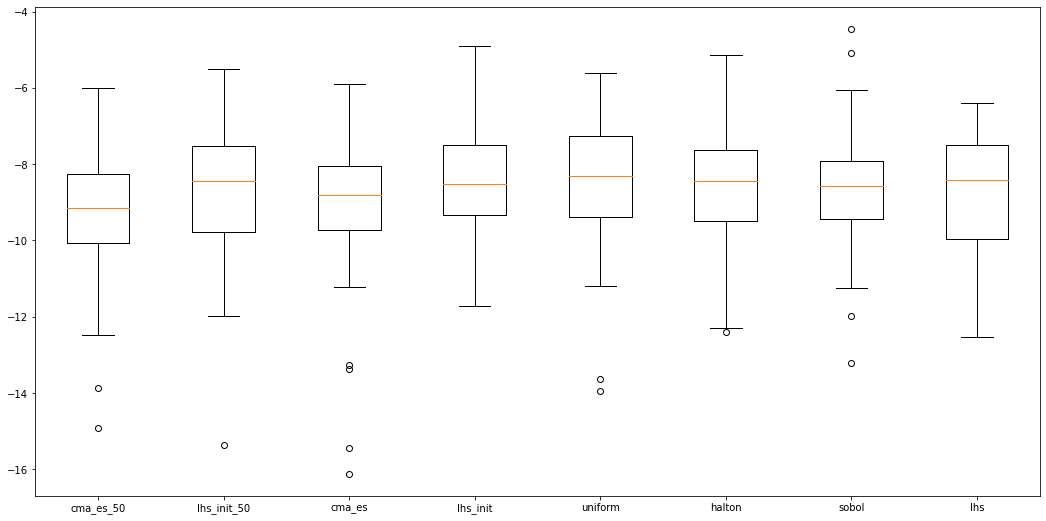

In [55]:
plt.rcParams["figure.figsize"] = (18, 9)

methods = ['cma_es_50', 'lhs_init_50', 'cma_es', 'lhs_init', 'uniform', 'halton', 'sobol', 'lhs']
plt.boxplot([np.log(stats[method + '_regret'].div(stats['abs_norm'])) for method in methods])
plt.xticks(list(range(1, len(methods) + 1)), methods)

([<matplotlib.axis.XTick at 0x7fce874dcb10>,
 [Text(0, 0, 'cma_es_50'),
  Text(0, 0, 'lhs_init_50'),
  Text(0, 0, 'cma_es'),
  Text(0, 0, 'lhs_init'),
  Text(0, 0, 'uniform'),
  Text(0, 0, 'halton'),
  Text(0, 0, 'sobol'),
  Text(0, 0, 'lhs')])

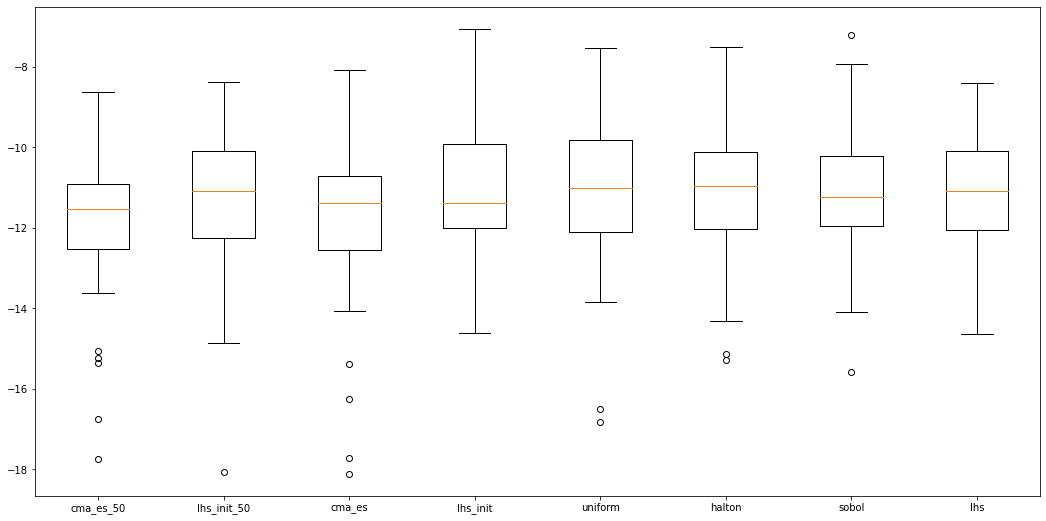

In [56]:
plt.rcParams["figure.figsize"] = (18, 9)

methods = ['cma_es_50', 'lhs_init_50', 'cma_es', 'lhs_init', 'uniform', 'halton', 'sobol', 'lhs']
plt.boxplot([np.log(stats[method + '_regret'].div(stats['minmax_norm'])) for method in methods])
plt.xticks(list(range(1, len(methods) + 1)), methods)